In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

In [150]:
smart_watch_csv = "datasets/smartwatch_03.csv"

In [151]:
df = pd.read_csv(smart_watch_csv)
df.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    object 
 5   Original Price                  610 non-null    object 
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 52.5+ KB


In [154]:
def to_float(x):
    return float(x.replace(",", ""))

In [155]:
df["Reviews"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
605     923.0
606     212.0
607    4941.0
608      15.0
609     688.0
Name: Reviews, Length: 610, dtype: float64

In [156]:
df[["Original Price", "Selling Price"]] = df[["Original Price", "Selling Price"]].applymap(to_float)
df["Discount percentage"] = df["Selling Price"]/df["Original Price"]

/tmp/ipykernel_15700/4013635096.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Original Price", "Selling Price"]] = df[["Original Price", "Selling Price"]].applymap(to_float)


In [157]:
numerical_col = [column for column in df.columns if df[column].dtype != 'object']
continous_col = [column for column in df.columns if df[column].dtype == 'object']
numerical_col

['Selling Price',
 'Original Price',
 'Rating (Out of 5)',
 'Average Battery Life (in days)',
 'Reviews',
 'Discount percentage']

In [158]:
df_numerical = df[numerical_col]
df_numerical

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount percentage
0,2499.0,2999.0,4.1,14,NaN,0.833278
1,2099.0,2499.0,4.2,14,NaN,0.839936
2,1722.0,2099.0,3.5,14,NaN,0.820391
3,2469.0,2999.0,4.1,14,NaN,0.823274
4,1799.0,2199.0,4.3,7,NaN,0.818099
...,...,...,...,...,...,...
605,3499.0,9999.0,4.1,10,923.0,0.349935
606,4999.0,14999.0,4.1,10,212.0,0.333289
607,2999.0,7999.0,4.0,8,4941.0,0.374922
608,5846.0,5999.0,2.4,5,15.0,0.974496


In [159]:
df_numerical.isna().sum(), df.duplicated().sum()

(Selling Price                       0
 Original Price                      0
 Rating (Out of 5)                  56
 Average Battery Life (in days)      0
 Reviews                           496
 Discount percentage                 0
 dtype: int64,
 np.int64(4))

In [160]:
df_numerical = df_numerical.drop_duplicates()

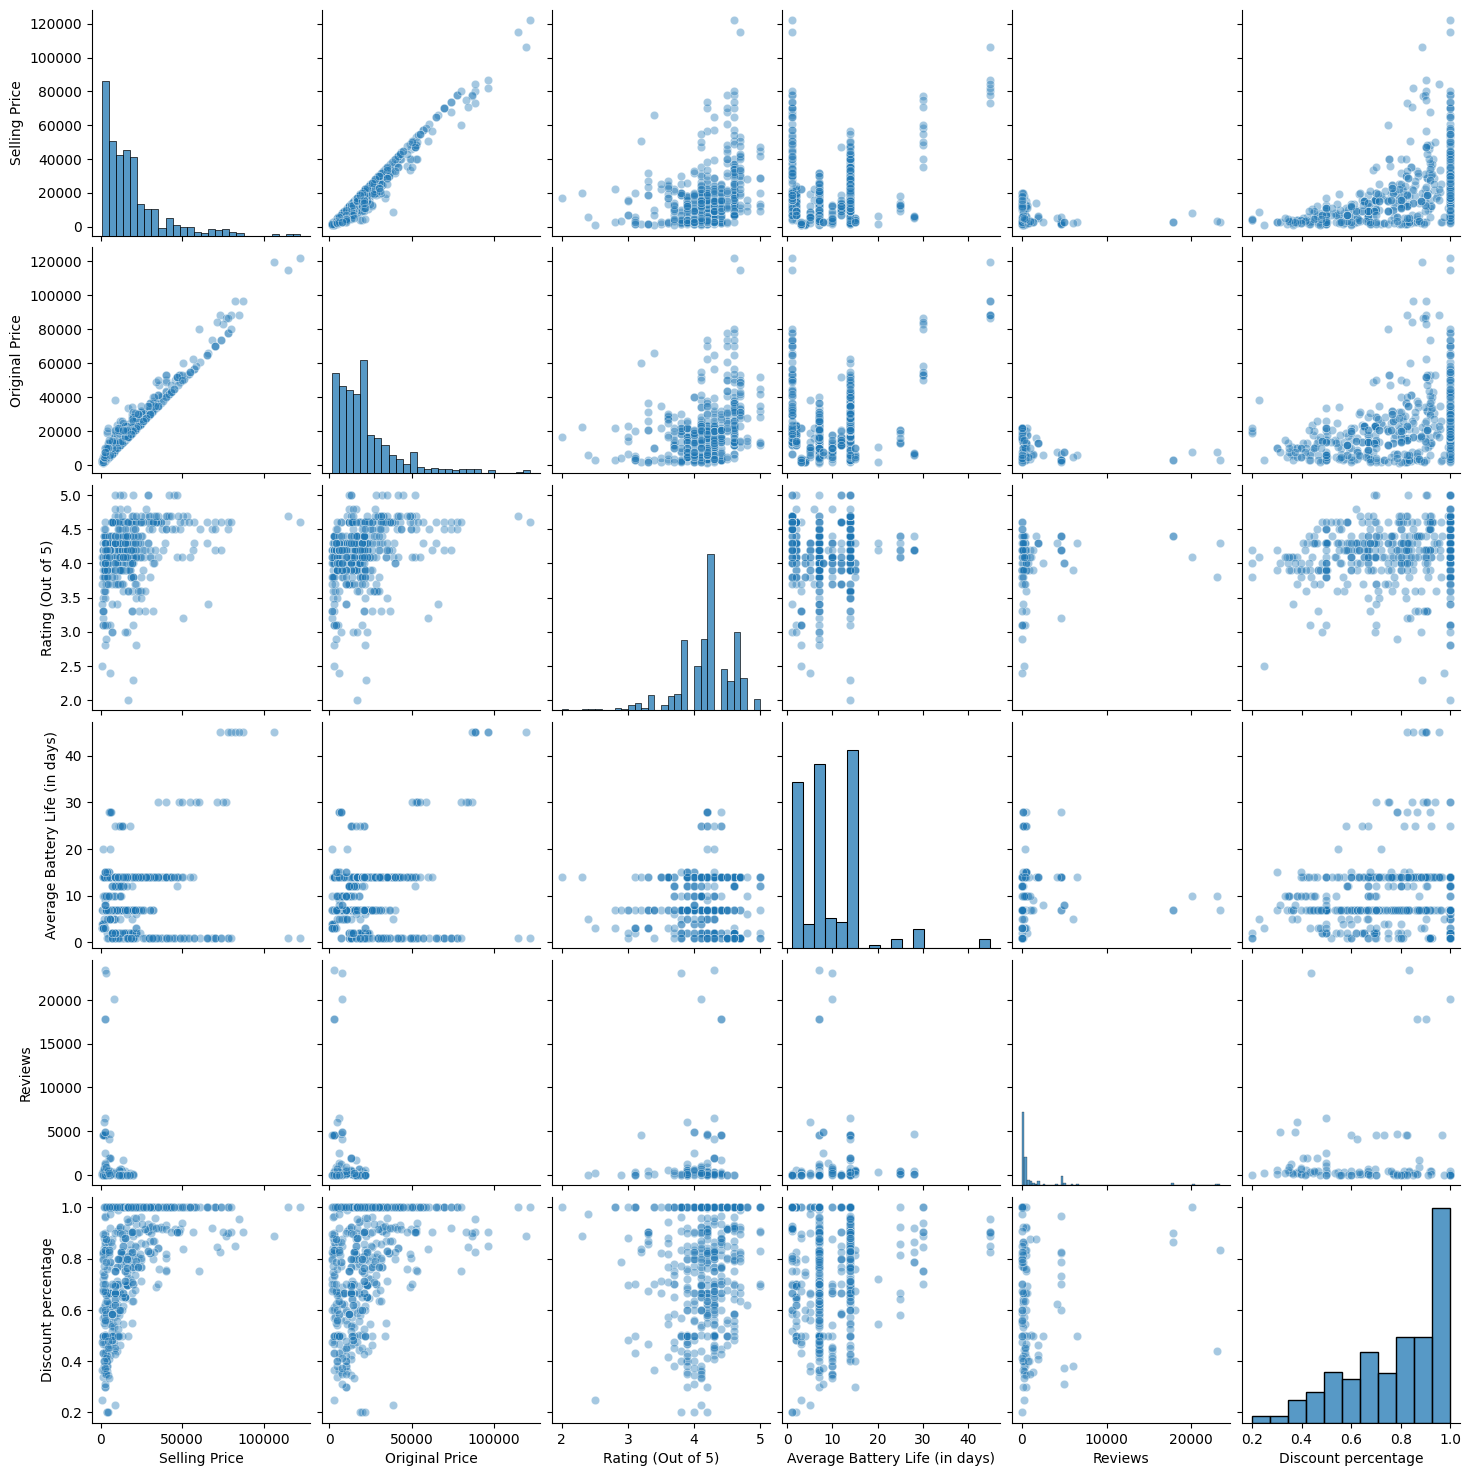

In [161]:
sns.pairplot(data=df_numerical,
             kind="scatter",
             plot_kws={"alpha": 0.4})

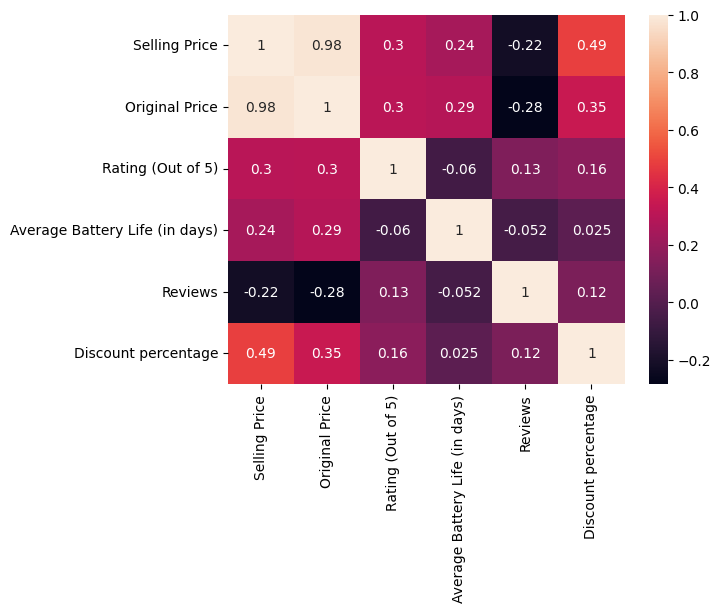

In [163]:
sns.heatmap(df_numerical.corr(), annot=True)
plt.plot(0)

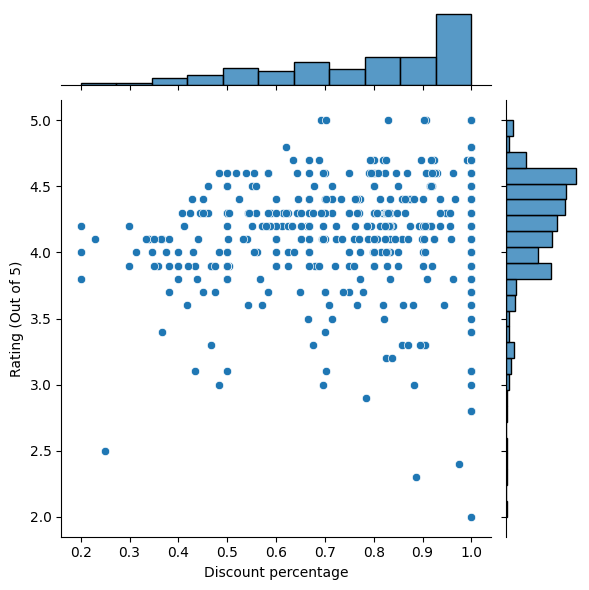

In [164]:
sns.jointplot(data=df_numerical, x=df_numerical['Discount percentage'],
              y=df["Rating (Out of 5)"])

Feature engineering

In [194]:
df = df.copy()

In [195]:
df.drop_duplicates(inplace=True)

In [196]:
train_df = df.sample(frac=0.8, random_state=43)
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [197]:
df.shape, train_df.shape, test_df.shape

((606, 12), (485, 13), (121, 13))

In [198]:
train_df.drop('index', axis=1, inplace=True)
test_df.drop('index', axis=1, inplace=True)

In [199]:
def hundred_to_zero(x):
    if x == 100:
        return x
    else:
        return x

In [200]:
train_df["Discount price"] = train_df['Selling Price'] - train_df['Original Price']
train_df["Average Battery Life (in days)"] = train_df["Average Battery Life (in days)"].astype(float)
train_df["Reviews"] = train_df["Reviews"].astype(float)
train_df['Discount percentage'] = train_df['Discount percentage'] * 100
train_df['Discount percentage'] = train_df['Discount percentage'].apply(lambda x: hundred_to_zero(x))
train_df.drop("Discount percentage", axis=1, inplace=True)
train_df.head(5)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews,Discount price
0,FOSSIL,Smartwatch,Q Venture,White,4399.0,21995.0,AMOLED Display,3.8,Leather,1.0,46.0,-17596.0
1,APPLE,Smartwatch,Series 5 GPS 40 mm Silver Aluminium Case,White,40900.0,40900.0,OLED Retina Display,4.7,Aluminium,1.0,NaN,0.0
2,huami,Smartwatch,Amazfit GTS 2e,Purple,7999.0,13999.0,AMOLED Display,4.2,Silicone,14.0,294.0,-6000.0
3,FOSSIL,Smartwatch,FTW2115 Q Watch,Red,18995.0,18995.0,AMOLED Display,4.6,Stainless Steel,2.0,NaN,0.0
4,huami,Smartwatch,Amazfit Bip S Lite,Black,1999.0,4999.0,AMOLED Display,3.9,Silicone,14.0,849.0,-3000.0


In [201]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      485 non-null    object 
 1   Device Type                     485 non-null    object 
 2   Model Name                      485 non-null    object 
 3   Color                           485 non-null    object 
 4   Selling Price                   485 non-null    float64
 5   Original Price                  485 non-null    float64
 6   Display                         485 non-null    object 
 7   Rating (Out of 5)               439 non-null    float64
 8   Strap Material                  485 non-null    object 
 9   Average Battery Life (in days)  485 non-null    float64
 10  Reviews                         84 non-null     float64
 11  Discount price                  485 non-null    float64
dtypes: float64(6), object(6)
memory usag

In [202]:
numerical_col = [column for column in train_df.columns if train_df[column].dtype == 'float64']
numerical_col

['Selling Price',
 'Original Price',
 'Rating (Out of 5)',
 'Average Battery Life (in days)',
 'Reviews',
 'Discount price']

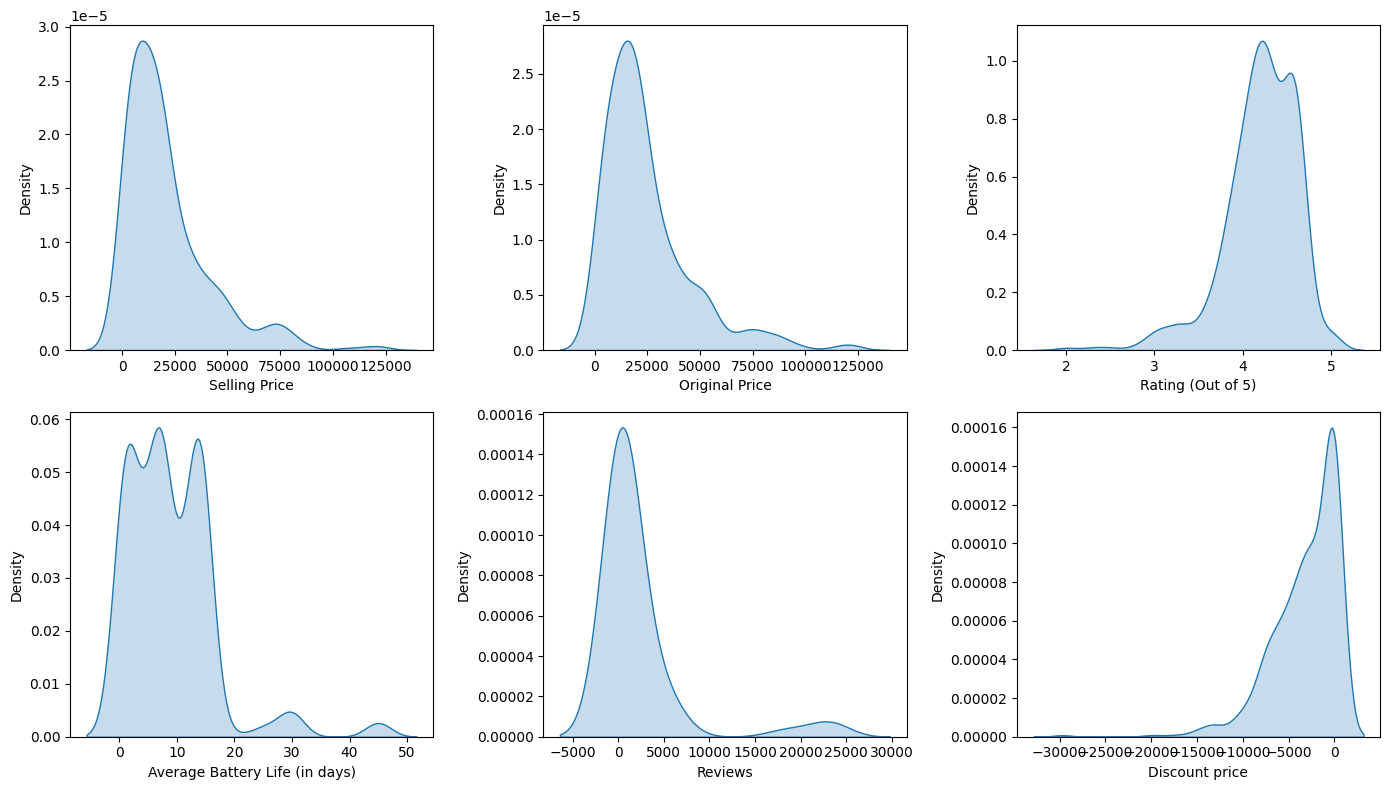

In [203]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[column], ax=ax, fill=True)
    
fig.tight_layout()
plt.show()

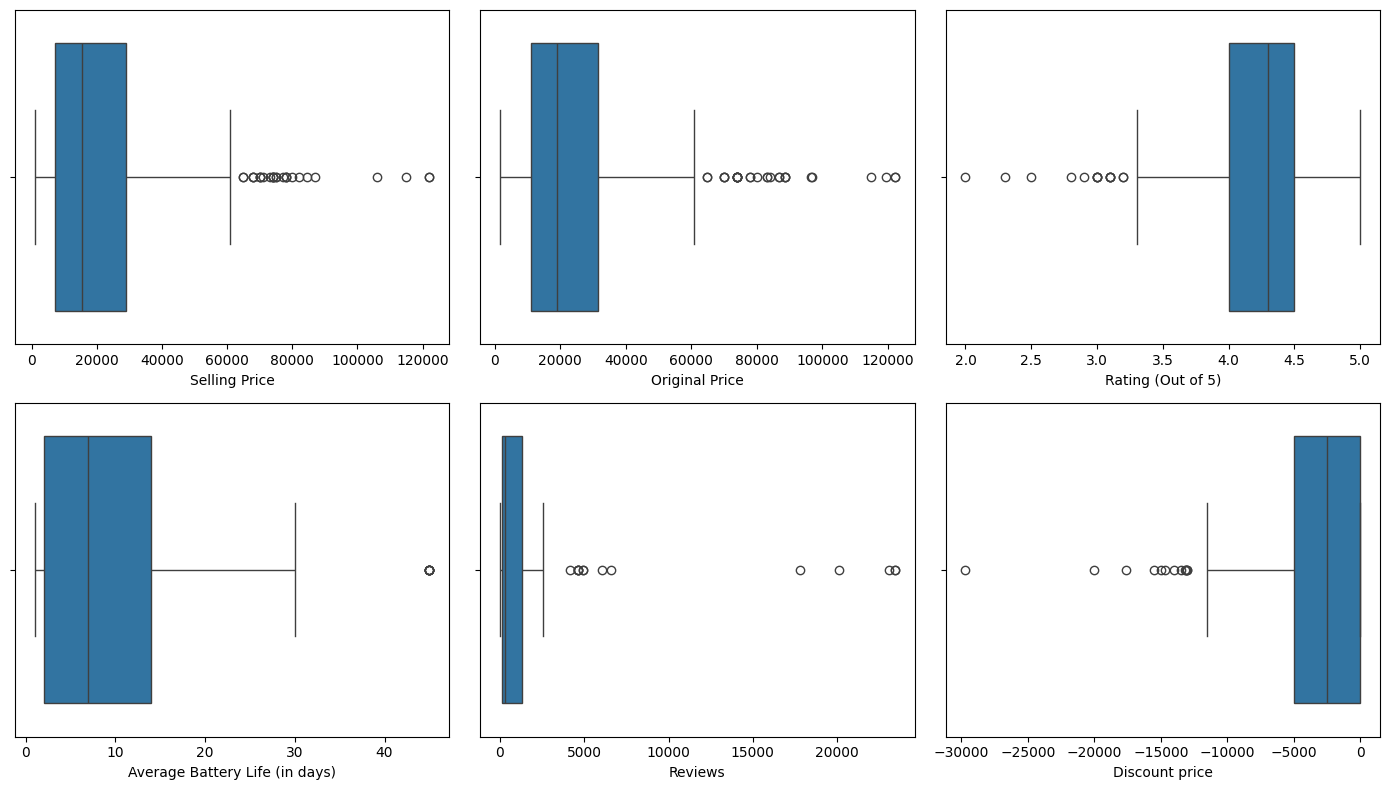

In [204]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax)
    
fig.tight_layout()
plt.show()

In [205]:
def remove_outlier_IQR(data: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Removes outliers from a DataFrame column using the IQR method.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    col (str): The column name for which to remove outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    if col not in data.columns:
        print(f"Column {col} does not exist in the DataFrame.")
        return data
    
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"Column {col} is not numeric and cannot be processed.")
        return data

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    print(f"Processing column: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    removed_outliers_count = len(data) - len(filtered_data)
    print(f"Removed {removed_outliers_count} outliers from column: {col}")
    
    return filtered_data

In [206]:
import_col = ['Selling Price', 'Original Price', 'Rating (Out of 5)', 'Reviews']
for col in import_col:
    print(f"Removing outliers from column: {col}")
    train_df = remove_outlier_IQR(data=train_df, col=col)

Removing outliers from column: Selling Price
Processing column: Selling Price
Q1: 6995.0, Q3: 28990.0, IQR: 21995.0
Lower bound: -25997.5, Upper bound: 61982.5
Removed 28 outliers from column: Selling Price
Removing outliers from column: Original Price
Processing column: Original Price
Q1: 9999.0, Q3: 26990.0, IQR: 16991.0
Lower bound: -15487.5, Upper bound: 52476.5
Removed 19 outliers from column: Original Price
Removing outliers from column: Rating (Out of 5)
Processing column: Rating (Out of 5)
Q1: 4.0, Q3: 4.5, IQR: 0.5
Lower bound: 3.25, Upper bound: 5.25
Removed 42 outliers from column: Rating (Out of 5)
Removing outliers from column: Reviews
Processing column: Reviews
Q1: 97.75, Q3: 1325.75, IQR: 1228.0
Lower bound: -1744.25, Upper bound: 3167.75
Removed 331 outliers from column: Reviews


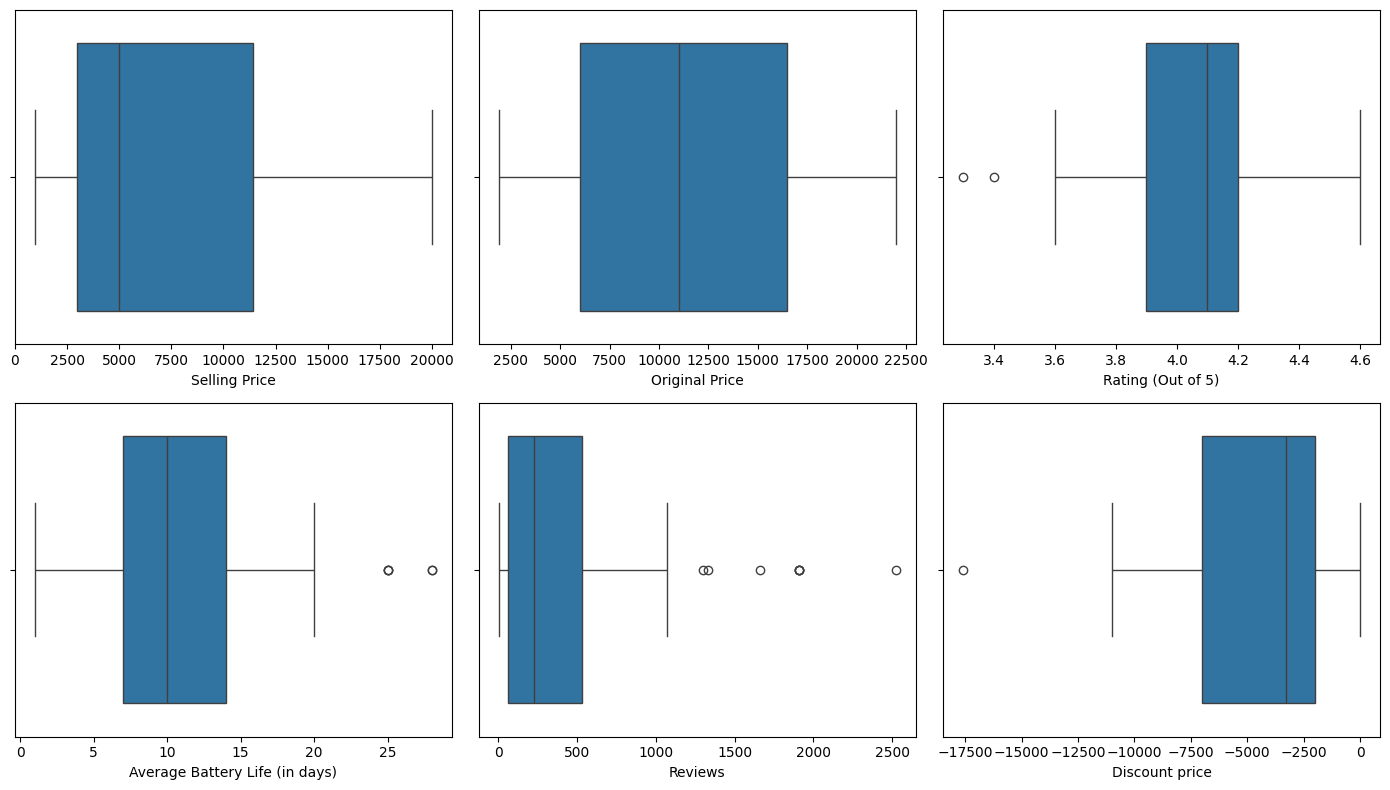

In [207]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))

for i, column in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[column], ax=ax)
    
fig.tight_layout()
plt.show()

In [208]:
for col in numerical_col:
    train_df[col].fillna(train_df[col].median(), inplace=True)

/tmp/ipykernel_15700/951206205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
/tmp/ipykernel_15700/951206205.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [209]:
train_df[numerical_col].isna().sum()

Selling Price                     0
Original Price                    0
Rating (Out of 5)                 0
Average Battery Life (in days)    0
Reviews                           0
Discount price                    0
dtype: int64

In [210]:
train_df[numerical_col].head()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount price
0,4399.0,21995.0,3.8,1.0,46.0,-17596.0
2,7999.0,13999.0,4.2,14.0,294.0,-6000.0
4,1999.0,4999.0,3.9,14.0,849.0,-3000.0
8,3799.0,9999.0,4.1,10.0,319.0,-6200.0
9,2499.0,3999.0,4.2,7.0,176.0,-1500.0


In [213]:
train_df = train_df.copy()

In [214]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [215]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [217]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [218]:
data.head()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
0,0.181102,1.000000,0.384615,0.000000,0.017050
1,0.370079,0.602110,0.692308,0.481481,0.115385
2,0.055118,0.154260,0.461538,0.481481,0.335448
3,0.149606,0.403065,0.615385,0.333333,0.125297
4,0.081365,0.104498,0.692308,0.222222,0.068596


In [219]:
data.shape, train_df.shape

((65, 5), (65, 12))

In [220]:
data.isna().sum()

Selling Price                     0
Original Price                    0
Rating (Out of 5)                 0
Average Battery Life (in days)    0
Reviews                           0
dtype: int64

In [222]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)

In [223]:
train_df.head(5)

,Brand Name,Device Type,Model Name,Color,Display,Strap Material,Discount price
0,FOSSIL,Smartwatch,Q Venture,White,AMOLED Display,Leather,-17596.0
2,huami,Smartwatch,Amazfit GTS 2e,Purple,AMOLED Display,Silicone,-6000.0
4,huami,Smartwatch,Amazfit Bip S Lite,Black,AMOLED Display,Silicone,-3000.0
8,Crossbeats,Smartwatch,Orbit Sport,Black,IPS Display,Silicone,-6200.0
9,huami,Smartwatch,Amazfit Neo,Black,AMOLED Display,Thermoplastic polyurethane,-1500.0


In [224]:
train_df = pd.concat([train_df, data], axis=1)

In [225]:
train_df

,Brand Name,Device Type,Model Name,Color,Display,Strap Material,Discount price,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
0,FOSSIL,Smartwatch,Q Venture,White,AMOLED Display,Leather,-17596.0,0.181102,1.000000,0.384615,0.000000,0.017050
2,huami,Smartwatch,Amazfit GTS 2e,Purple,AMOLED Display,Silicone,-6000.0,0.055118,0.154260,0.461538,0.481481,0.335448
4,huami,Smartwatch,Amazfit Bip S Lite,Black,AMOLED Display,Silicone,-3000.0,0.081365,0.104498,0.692308,0.222222,0.068596
8,Crossbeats,Smartwatch,Orbit Sport,Black,IPS Display,Silicone,-6200.0,0.149606,0.204021,0.692308,0.481481,0.141554
9,huami,Smartwatch,Amazfit Neo,Black,AMOLED Display,Thermoplastic polyurethane,-1500.0,0.107612,0.204021,0.692308,0.296296,0.527756
...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212598,0.204021,0.846154,0.481481,0.132831
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170131,0.403065,0.461538,0.333333,0.041634
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527507,1.000000,0.461538,0.037037,0.236717
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.527454,1.000000,0.461538,0.481481,0.017050


In [226]:
train_df[numerical_col]

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews,Discount price
0,0.181102,1.000000,0.384615,0.000000,0.017050,-17596.0
2,0.055118,0.154260,0.461538,0.481481,0.335448,-6000.0
4,0.081365,0.104498,0.692308,0.222222,0.068596,-3000.0
8,0.149606,0.204021,0.692308,0.481481,0.141554,-6200.0
9,0.107612,0.204021,0.692308,0.296296,0.527756,-1500.0
...,...,...,...,...,...,...
60,0.212598,0.204021,0.846154,0.481481,0.132831,NaN
61,0.170131,0.403065,0.461538,0.333333,0.041634,NaN
62,0.527507,1.000000,0.461538,0.037037,0.236717,NaN
63,0.527454,1.000000,0.461538,0.481481,0.017050,NaN
